# <div style=" color:#5072A7; padding: 10px; font-size: 24px; font-weight: bold;  text-align: center;">✦ TP1: Implémentation de la logique floue avec FloLib ✦ </div>

<div>
    <h2 style="text-align: left;"><span style="letter-spacing: 2px;">Réalisé par :</span></h2>
   
</div>

<div style="text-align: left;" >
    <li>Salma FARAJ</li>
  
   
</div>

<h2 style=" color:#428d8e;">1
ère Partie : Introduction théorique et installation</h2>  

1. Assurez-vous que Python est installé sur votre machine puis installez FloLib en
utilisant la commande suivante :

In [ ]:
# Importation de la classe FuzzyVariable depuis la bibliothèque FloLib
pip install floulib

In [6]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


2. Ouvrez un fichier Python ou un notebook Jupyter et testez l’installation en important
FloLib :


In [13]:
import numpy as np            # Pour les calculs numériques
import skfuzzy as fuzz        # Bibliothèque de logique floue
import matplotlib.pyplot as plt   # Pour visualiser les fonctions d'appartenance

3. Créez une variable floue Température avec les états linguistiques "Froid", "Moyen", et
"Chaud" puis visualisez les fonctions d’appartenance.

In [15]:
x_temp = np.arange(0, 51, 1)  # Intervalle de température de 0 à 50 degrés
# Définition des fonctions d'appartenance pour chaque état
temp_froid = fuzz.trapmf(x_temp, [0, 0, 10, 20])    # État "Froid"
temp_moyen = fuzz.trapmf(x_temp, [15, 20, 30, 35])  # État "Moyen"
temp_chaud = fuzz.trapmf(x_temp, [30, 40, 50, 50])  # État "Chaud"

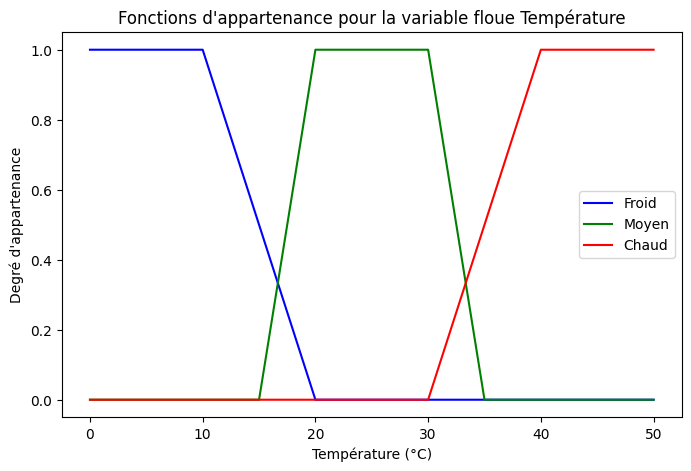

In [16]:
# Visualiser les fonctions d’appartenance
# Visualisation des fonctions d'appartenance
plt.figure(figsize=(8, 5))
plt.plot(x_temp, temp_froid, 'b', label='Froid')
plt.plot(x_temp, temp_moyen, 'g', label='Moyen')
plt.plot(x_temp, temp_chaud, 'r', label='Chaud')
plt.title("Fonctions d'appartenance pour la variable floue Température")
plt.xlabel("Température (°C)")
plt.ylabel("Degré d'appartenance")
plt.legend()
plt.show()

<h2 style=" color:#428d8e;;">2
ème Partie : Système flou pour le contrôle de température</h2>  

On vous demande dans cette partie de créer un système flou qui ajuste la puissance d’un
chauffage en fonction de la température ambiante. Les variables sont :
• Entrée : Température (Froid, Moyen, Chaud).
• Sortie : Puissance de chauffage (Faible, Moyenne, Forte).
1. Créer une nouvelle variable floue Chauffage

In [34]:
# Importation des bibliothèques nécessaires
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Définir la variable d'entrée Température
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'Température')
# Définition des fonctions d'appartenance pour la variable Température
temperature['Froid'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['Moyen'] = fuzz.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['Chaud'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Définir la variable de sortie Chauffage
chauffage = ctrl.Consequent(np.arange(0, 101, 1), 'Chauffage')
# Définition des fonctions d'appartenance pour la variable Chauffage
chauffage['Faible'] = fuzz.trimf(chauffage.universe, [0, 0, 50])
chauffage['Moyenne'] = fuzz.trimf(chauffage.universe, [25, 50, 75])
chauffage['Forte'] = fuzz.trimf(chauffage.universe, [50, 100, 100])


2. Ajouter des fonctions d’appartenance à la variable Chauffage

In [35]:
# Définition des règles floues
rule1 = ctrl.Rule(temperature['Froid'], chauffage['Forte'])
rule2 = ctrl.Rule(temperature['Moyen'], chauffage['Moyenne'])
rule3 = ctrl.Rule(temperature['Chaud'], chauffage['Faible'])


3. Implémenter un ensemble de règles floues pour réguler la puissance du chauffage.

In [36]:
# Création du système de contrôle
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
heating = ctrl.ControlSystemSimulation(heating_ctrl)

# Exemple de simulation avec une température ambiante de 18 degrés
heating.input['Température'] = 18

# Calcul de la puissance de chauffage
heating.compute()

# Résultat
print("Puissance de chauffage suggérée : {:.2f}%".format(heating.output['Chauffage']))


Puissance de chauffage suggérée : 57.52%


<h2 style=" color:#428d8e;;letter-spacing: 1px;">3
ème Partie : Exploitation avancée de la bibliothèque FloLib</h2>  

Il s’agit dans cette partie de concevoir et mettre en place un système de gestion de la vitesse
d’un véhicule. On s’intéresse à l’ajustement de la vitesse d’un véhicule en fonction de deux
entrées : la distance de l’obstacle et la visibilité.

1. Créer les variables d’entrée et de sortie

In [116]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Création des variables d'entrée et de sortie
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')  # Distance de 0 à 100 mètres
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'visibilite')  # Visibilité de 0 à 100 %
vitesse = ctrl.Consequent(np.arange(0, 121, 1), 'vitesse')  # Vitesse de 0 à 120 km/h


2. Définir les fonctions d’appartenance pour chaque variable.

Les fonctions d’appartenance pour chaque variable ont déjà été définies ci-dessus avec des formes triangulaires et trapézoïdales.

In [117]:
# Définition des fonctions d'appartenance pour la distance
distance['proche'] = fuzz.trapmf(distance.universe, [0, 0, 20, 40])
distance['moyenne'] = fuzz.trapmf(distance.universe, [30, 50, 50, 70])
distance['lointaine'] = fuzz.trapmf(distance.universe, [60, 80, 100, 100])

# Définition des fonctions d'appartenance pour la visibilité
visibilite['faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 20, 40])
visibilite['moyenne'] = fuzz.trapmf(visibilite.universe, [30, 50, 50, 70])
visibilite['bonne'] = fuzz.trapmf(visibilite.universe, [60, 80, 100, 100])

# Définition des fonctions d'appartenance pour la vitesse
vitesse['ralentir'] = fuzz.trimf(vitesse.universe, [0, 0, 60])
vitesse['moderee'] = fuzz.trimf(vitesse.universe, [40, 60, 80])
vitesse['rapide'] = fuzz.trimf(vitesse.universe, [60, 120, 120])

3. Etablir des règles floues pour contrôler la vitesse en fonction des deux entrées.

In [118]:

# Création des règles
rule1 = ctrl.Rule(distance['proche'] & visibilite['faible'], vitesse['ralentir'])
rule2 = ctrl.Rule(distance['proche'] & visibilite['moyenne'], vitesse['ralentir'])
rule3 = ctrl.Rule(distance['moyenne'] & visibilite['faible'], vitesse['ralentir'])
rule4 = ctrl.Rule(distance['moyenne'] & visibilite['moyenne'], vitesse['moderee'])
rule5 = ctrl.Rule(distance['moyenne'] & visibilite['bonne'], vitesse['rapide'])
rule6 = ctrl.Rule(distance['lointaine'] & visibilite['faible'], vitesse['moderee'])
rule7 = ctrl.Rule(distance['lointaine'] & visibilite['moyenne'], vitesse['rapide'])
rule8 = ctrl.Rule(distance['lointaine'] & visibilite['bonne'], vitesse['rapide'])


4. Simuler plusieurs scénarios en variant la distance et la visibilité et observer la vitesse
recommandée.

In [119]:
# Création du système de contrôle
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
vitesse_simulateur = ctrl.ControlSystemSimulation(vitesse_ctrl)

# Fonction de simulation de vitesse
def simuler_vitesse(distance_value, visibilite_value):
    vitesse_simulateur.input['distance'] = distance_value
    vitesse_simulateur.input['visibilite'] = visibilite_value
    vitesse_simulateur.compute()  # Calculer la sortie
    return vitesse_simulateur.output['vitesse']

# Scénarios de test
scenarios = [
    (20, 10),  # Distance proche et faible visibilité
    (70, 30),  # Distance lointaine et faible visibilité
    (30, 50),  # Distance moyenne et visibilité moyenne
]

# Afficher les résultats
for distance_value, visibilite_value in scenarios:
    vitesse_recommandee = simuler_vitesse(distance_value, visibilite_value)
    print(f'Distance: {distance_value}, Visibilité: {visibilite_value} -> Vitesse recommandée: {vitesse_recommandee:.2f} km/h')


Distance: 20, Visibilité: 10 -> Vitesse recommandée: 20.00 km/h
Distance: 70, Visibilité: 30 -> Vitesse recommandée: 60.00 km/h
Distance: 30, Visibilité: 50 -> Vitesse recommandée: 23.33 km/h


5. Modifier les seuils des fonctions d’appartenance pour rendre le système plus sensible à
certaines variations.

In [120]:
# Exemple de modification des seuils pour la distance
distance['proche'] = fuzz.trapmf(distance.universe, [0, 0, 15, 30])  # Rapprochement de la fonction
distance['moyenne'] = fuzz.trapmf(distance.universe, [25, 45, 55, 75])
distance['lointaine'] = fuzz.trapmf(distance.universe, [70, 85, 100, 100])


6. Ajouter une règle pour rendre la vitesse plus prudente en cas de distance moyenne et
faible visibilité.

In [121]:
rule9 = ctrl.Rule(distance['moyenne'] & visibilite['faible'], vitesse['ralentir'])


7. Ajouter une règle de "sécurité" pour ralentir si la visibilité est très faible, peu importe
la distance.

In [122]:
# Nouvelle règle de sécurité pour ralentir si la visibilité est très faible
rule10 = ctrl.Rule(visibilite['faible'], vitesse['ralentir'])


8. Tester différentes combinaisons de valeurs pour Distance et Visibilité puis observer
l'impact de ces ajustements.

In [124]:
# Scénarios de test
new_scenarios = [
    (20, 10),  # Distance proche et faible visibilité
    (70, 30),  # Distance lointaine et faible visibilité
    (30, 50),  # Distance moyenne et visibilité moyenne
    (10, 10),  # Distance très proche et visibilité très faible
    (50, 10),  # Distance moyenne et visibilité très faible
    (30, 90),  # Distance moyenne et bonne visibilité
]

# Afficher les résultats
for distance_value, visibilite_value in new_scenarios:
    try:
        vitesse_recommandee = simuler_vitesse(distance_value, visibilite_value)
        print(f'Distance: {distance_value}, Visibilité: {visibilite_value} -> Vitesse recommandée: {vitesse_recommandee:.2f} km/h')
    except RuntimeError as e:
        print(f"Erreur lors de la simulation pour Distance: {distance_value}, Visibilité: {visibilite_value}: {e}")

Distance: 20, Visibilité: 10 -> Vitesse recommandée: 20.00 km/h
Distance: 70, Visibilité: 30 -> Vitesse recommandée: 60.00 km/h
Distance: 30, Visibilité: 50 -> Vitesse recommandée: 23.33 km/h
Erreur lors de la simulation pour Distance: 10, Visibilité: 10: Unable to resolve rule execution order. The most likely reason is two or more rules that depend on each other.
Please check the rule graph for loops.
Erreur lors de la simulation pour Distance: 50, Visibilité: 10: Unable to resolve rule execution order. The most likely reason is two or more rules that depend on each other.
Please check the rule graph for loops.
Erreur lors de la simulation pour Distance: 30, Visibilité: 90: Unable to resolve rule execution order. The most likely reason is two or more rules that depend on each other.
Please check the rule graph for loops.


# <div style=" color:#5072A7; padding: 10px; font-size: 24px; font-weight: bold;  text-align: center;">✦ FIN ✦ </div>